# 5장 서포트 벡터 머신

**SVM은 선형(or비선형) 분류, 회귀, 이상치 탐색에도 사용할 수 있는 다목적 머신러닝 모델!!**

## 주요 내용

- 선형 SVM 분류
- 비선형 SVM 분류: 커널 트릭
- SVM 회귀
- SVM 이론

## 기본 설정

**매번 하던 기본 설정!!**

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5) 

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "svm"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# 5.1 선형 SVM 분류

## 라지 마진 분류

가장 큰 마진을 찾는 알고리즘이라고 할 수 있다. <br>
**즉, 두 클래스 경계 사이가 가장 넓은 폭을 찾는 알고리즘 --> 서포트 벡터(샘플)**

붓꽃 데이터에서 세토사(setosa) 품종과 버시컬러(versicolor) 품종만을 대상으로 선형 SVM 분류기(하드 마진 분류)를 학습시킨다.

In [2]:
from sklearn.svm import SVC
from sklearn import datasets                    # 데이터셋 가져오기

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                      # 특성 2개(꽃잎 길이, 꽃잎 너비)
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)      # 세토사와 버시컬러만 대상임.
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM 분류 모델
# SVC --> libsvm클래스, LinearSVC --> liblinear클래스
# OvO, OvR (앞에서 배웠던 내용)
# 비선형/선형, 선형 모델 제공
# 힌지 손실, 제곱 힌지 손실

# SVC(kernel="linear")가 LinearSVC의 loss='squared_hinge' 를 'hinge' 로 하면??
# 더욱 서로 유사한 `선형 SVM 분류모델` 이 된다.
svm_clf = SVC(kernel="linear", )  # C=무한대. 즉, 하드 마진 분류임. (왜 C값 주면 에러뜨지,,)
svm_clf.fit(X, y)

# C값을 크게주면 규제가 적어진다.

SVC(kernel='linear')

아래 함수는 SVM 분류 모델로 학습된 내용을 그래프로 보여준다.
3개의 인자가 요구된다.

* `svm_clf`: 학습된 SVM 모델
* `xmin`, `xmax`: 그래프의 x축 좌표 구간

In [3]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]            # 결정경계 파라미터(w0, w1)
    b = svm_clf.intercept_[0]       # 절편(b)

    # 결정경계에서 w0*x0 + w1*x1 + b = 0 이므로 (값이 0인 것을 결정경계)
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200) # 200개의 x좌표로 그래프 나타내려고 이러는 중
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]    # 결정경계

    margin = 1/w[1]                                 # 마진(도로 폭)
    gutter_up = decision_boundary + margin          # 도로 경계(윗쪽)
    gutter_down = decision_boundary - margin        # 도로 경계(아랫쪽)

    # 서포트 벡터 표시
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') # scatter로 표시된 부분
    # 참고로 두 클래스 경계 사이가 가장 넓은 부분 두 scatter를 #FFAAAA 색으로 색칠한 부분이다.
    
    # 결정경계 및 도로 경계 그리기
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

그림 저장: large_margin_classification_plot


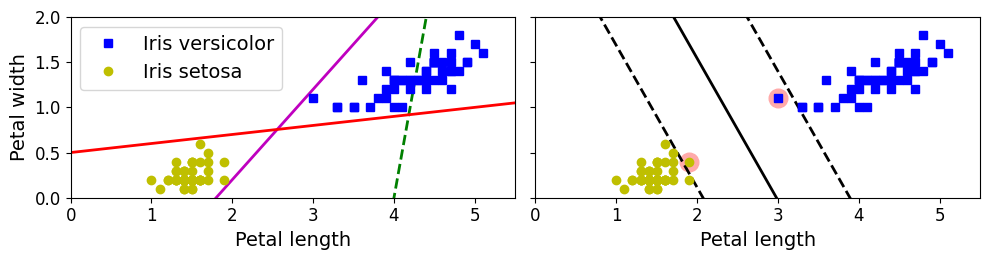

In [4]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼쪽 그림
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth=2)
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# 오른쪽 그림
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs") # blue_네모
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo") # yellow_동그라미
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

save_fig("large_margin_classification_plot")
plt.show()

# 왼편 그림: 일반적인 선형 분류의 단점을 보여주기 위해 일부러 선분을 극단적으로 그림.
# 오른편 그림: SVM (하드 마진) 분류의 장점을 잘 보여줌.

### 특성의 스케일에 민감

* 꼭 전처리로 스케일을 하는걸 추천

그림 저장: sensitivity_to_feature_scales_plot


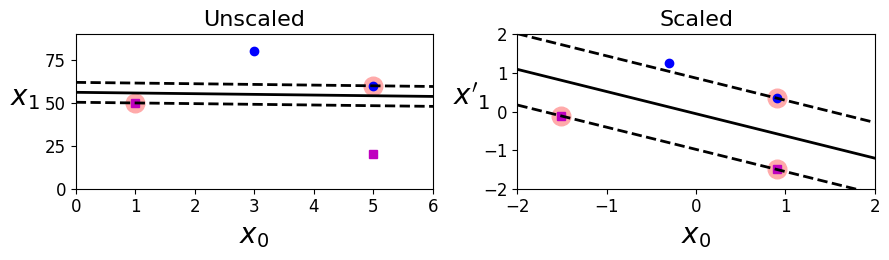

In [5]:
# 학습 데이터 4개
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# SVM 훈련
svm_clf = SVC(kernel="linear", C=100)   # 마진 조금 허용
svm_clf.fit(Xs, ys)

# 왼편 그림(축척 조정 전처리 사용X)
plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# 오른편 그림(축척 조정 전처리 사용)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs) # 특성을 스케일링 해서 데이터 변환
svm_clf.fit(X_scaled, ys) 

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

save_fig("sensitivity_to_feature_scales_plot")

# 왼편 그림: 축척 조정 없음
# 오른편 그림: 축척 조정 전처리 추가(그래프 보면 스케일이 맞춰져있음)

### 이상치에 민감

* 꼭 이상치를 잘 고려

그림 저장: sensitivity_to_outliers_plot


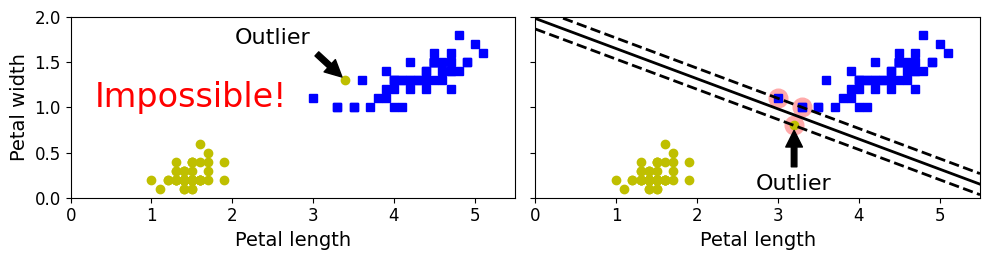

In [6]:
# 이상치 두 개를 정의
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

# 왼편 그림 훈련 세트
Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)

# 오른편 그림 훈련 세트
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼편 그림: 하드 마진 분류 불가능 - 이상치 때문
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# 오른편 그림: 좋지 않은 하드 마진 분류. SVC와 linear 커널 사용. - 이상치 때문에 마진이 너무 작다
svm_clf2 = SVC(kernel="linear", C=10**9)     # 마진 매우 작게 설정
svm_clf2.fit(Xo2, yo2)

plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

save_fig("sensitivity_to_outliers_plot")
plt.show()

# 왼편 그림에 사용된 이상치의 꽃잎 길이/너비 특성: `[3.4, 1.3]`
# 오른편 그림에 사용된 이상치의 꽃잎 길이/너비 특성: `[3.2, 0.8]`

## 라지 마진 vs 마진 오류

아래 코드는 마진 오류를 허용하는, 즉 __소프트 마진 분류__를 지원하는 선형 SVM 학습법을 보여준다. 

* `LinearSVC`: 선형 SVM 이진 분류 모델. 
    - `C=1`: 기본값
    - `logss=hinge`: hinge 손실함수 사용. 기본값은 `squared_hinge`, hinge 손실함수의 제곱이며 미분가능.
    - `dual=True`: 쌍대성(duality) 이용 여부. True가 기본. 하지만 특성 수가 샘플 수보다 작을 때는 False 권장.
* 훈련 세트: 붓꽃 데이터 전체
* 타깃: 버지니카 품종 여부 (음성 0, 양성 1)
* 표준화 축척 조정 전처리 사용

__주의사항:__ `LinearSVC` 모델의 `C`에 의한 규제에 편향(절편)도 포함된다.
따라서 평균을 빼서 0으로 편향을 없애는 것이 중요하다. 
하지만 표준화 축척 조정을 하면 자연스럽게 해결된다.

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]                   # 특성: 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # 타깃: 버지니카(Iris-Verginica) 품종 여부

# 로스 함수를 힌지로 변경
svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("linear_svc", LinearSVC(C=1, loss="hinge", random_state=42)),
    ])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

`[5.5, 1.7]` 특성을 갖는 붓꽃에 대한 예측은 양성, 즉 버지니카 품종이다.

In [8]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

아래 코드는 소프트 마진 분류에 사용되는 규제(`C`)의 역할을 보여주는 그림을 그린다. 
규제 `C`에 선형적으로 반비례하여 규제 강도가 정해진다. 
`C=float("inf")`, 즉 무한대이면 마진을 전혀 허용하지 않는 하드 마진 분류 모델이 된다.

- `svm_clf1`: `C=1`, 즉 다소 많은 마진 오류 허용. 도로폭 큼. 규제는 강함.
- `svm_clf2`: `C=100`, 보다 적은 마진 오류 허용. 도로폭 보다 좁아짐. 규제는 보다 약함.

In [9]:
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)     # C=1
svm_clf2 = LinearSVC(C=100, loss="hinge", random_state=42)   # C=100

# 축척 조정 전처리 사용
scaler = StandardScaler()

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])

scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

# 훈련
scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

&#x270b; __참고: 원시 데이터(raw data)의 결정경계__

훈련을 통해 학습된 결정경계의 파라미터는 모두 표준화된 값들을 대상으로 하였기 때문에
원시 데이터에 대한 결정경계 도로와 서포트 벡터를 그림으로 표시하려면 표준화 과정을 되돌리는 값을
사용해야 한다.

$\mathbf{x}$를 원시 데이터(raw data) 벡터라고 하고 $\mathbf{z}$를 표준화된 벡터이라 할 때 다음 관계가 성립한다. 

$$
\mathbf{z} = \frac{\mathbf{x}-\mu}{\sigma} \tag{*}
$$

* $\mu$: 평균값(mean)
* $\sigma$: 표준편차(standard deviation)

훈련된 `LinearSVC` 모델의 결정경계 함수(decision function)는 아래 선형함수이다.

$$
h(\mathbf{z}) = w_1 z_1 + \cdots + w_n z_n + b
$$

원시 데이터 $\mathbf{x}$에 대한 결정경계 또한 위 결정경계 함수에 의존하도록 해야 한다. 
$\mathbf{x}$와 결정경계 함수와의 관계를 확인하기 위해 위 식에 $(*)$ 를 대입하여
$x_i$와 결정경계 함수 사이의 관계를 확인한다.

$$
\begin{align*}
w_1 z_1 + \cdots + w_n z_n + b &= w_1 \frac{x_1-\mu}{\sigma} + \cdots + w_n \frac{x_n-\mu}{\sigma} + b \\
&= \frac{w_1}{\sigma} x_1 + \cdots + \frac{w_n}{\sigma} x_n + \left (w_1 \left (-\frac{\mu}{\sigma}\right) + \cdots + w_n \left (-\frac{\mu}{\sigma}\right) + b\right) \\
&= \frac{w_1}{\sigma} x_1 + \cdots + \frac{w_n}{\sigma} x_n + h (-\mu / \sigma)
\end{align*}
$$

결론적으로, 원시 데이터의 각 특성 $x_i$에 대한 파라미터 $w'_i$와 편항 $b'$은 아래와 같다.

$$
\begin{align*}
w'_i & = w_i/\sigma \\[1ex]
b' & = h (-\mu / \sigma)
\end{align*}
$$

참고: https://github.com/ageron/handson-ml/issues/250

아래 코드는 위 설명을 반영하여 원시 데이터에 대한 결정경계 함수의 파라미터와 편향을 계산한다. 
코드에 사용된 객체의 속성은 다음과 같다.

* 'LinearSVC.coef_[0]' 속성: 학습된 파라미터 벡터 $\mathbf{w}$ 저장
* 'LinearSVC.decision_function()' 메서드: 결정 함수 
* 'StandardScaler.mean_' 속성: 원시 데이터의 평균값 저장
* 'StandardScaler.scale_' 속성: 원시 데이터의 표준편차 저장

In [10]:
# 이와 같은 번거로운 작업을 하는 이유는 모델을 학습 할 때는 원본 데이터를
# 스케일해서 하려고 하기 때문이고, 다시 해당 모델의 결과를 그래프로 나타날때는
# 원본 데이터를 이용해줘야 하니까 이런 번거로운 과정을 진행하는 것이다.

# 스케일되지 않은 파라미터로 다시 변경 (위에서 언급한 공식 이용)
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])  # 절편
w1 = svm_clf1.coef_[0] / scaler.scale_                            # 기울기 파라미터
w2 = svm_clf2.coef_[0] / scaler.scale_                            # 기울기 파라미터

# 새로운 파라미터와 편향 지정
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# 서포트 벡터 찾기: libsvm과 달리 liblinear 라이브러리에서 제공되지 않기에 직접 넣어줌.
# libsvm에서의 .support_vectors_ 를 의미!!
# 부울 인덱싱을 이용하여 결정경계 도로 안에 위치한 값들을 서포트 벡터로 지정함.

# 힌지손실 함수 max(0, 1-t*y) 이다. 즉, t*y > 1 --> 0 (이때 t=1 or t=-1), (y는 결정함수), t*y<1 --> 1-t*y
# t가 양성(1)때 y>1, t가 음성(-1)때 y<-1, 즉 |y|>1 이면 y는 0이다. (결정경계는 결정함수가 0인 지점이다.)
# 그런데 우리는 y값은 [0,1]로 지정 했으므로 t를 [-1,1]로 바꾸게끔 아래 식을 사용했다.
# => 만약 라이브러리를 이용했다면? 이과정을 자동으로 해주므로 굳이 y를 [-1,1]이 아닌 [0,1]로 지정해도 문제없이 동작한 것이다.
t = y * 2 - 1                                               # +1, -1 값
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()   # 결정경계 +- 1 안에 있는 데이터
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

`plot_svc_decision_boundary()` 함수를 이용하여 `C` 값의 영향력을 보여주는 그림을 그린다.

* 왼편 그림: `C=1` 일 때.
* 오른편 그림: `C=100` 일 때.

그림 저장: regularization_plot


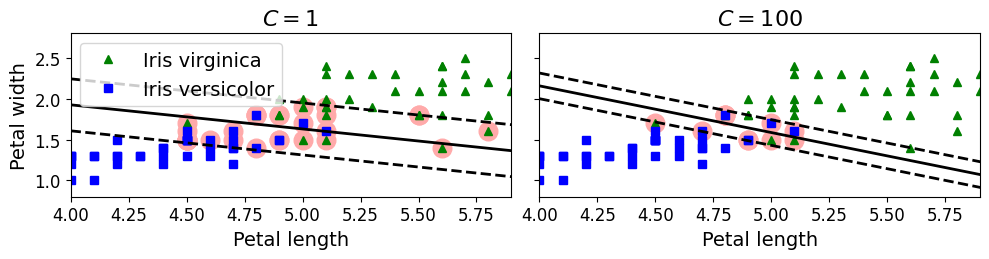

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# 왼편 그림: svm_clf1 모델
plt.sca(axes[0])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs", label="Iris versicolor")
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

# 오른편 그림: svm_clf2 모델
plt.sca(axes[1])
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.xlabel("Petal length", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

save_fig("regularization_plot")

# 5.2 비선형 SVM 분류

참고로 LinearSVC 클래스에서는 비선형은 지원하지 않는다고 했었음

다항 특성을 추가하여 비선형 회귀문제를 선형 회귀로 해결하는 방식을 4장에서 살펴 보았다.
동일한 아이디어로 선형 SVM 분류기를 비선형 SVM 분류 모델로 훈련시키는 것을 보여준다.

아래 코드는 2차 다항 특성을 추가할 경우 비선형 분류 문제를 선형 분류로 해결할 수 있음을 보여주는
그림을 그린다.

In [12]:
# -4에서 4 사이의 9개의 점 활용: 원래 한 개의 특성만 사용
X1D = np.linspace(-4, 4, 9).reshape(-1, 1) # 여기선 y축 값을 그냥 아래에선 0으로 출력

# 2차 다항 특성 추가
X2D = np.c_[X1D, X1D**2] # 제곱을 추가해줬음(덕분에 y축 값을 이 값으로 활용하면 됨)

# 타깃: 원점에 가까운 5개 데이터만 양성
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

그림 저장: higher_dimensions_plot


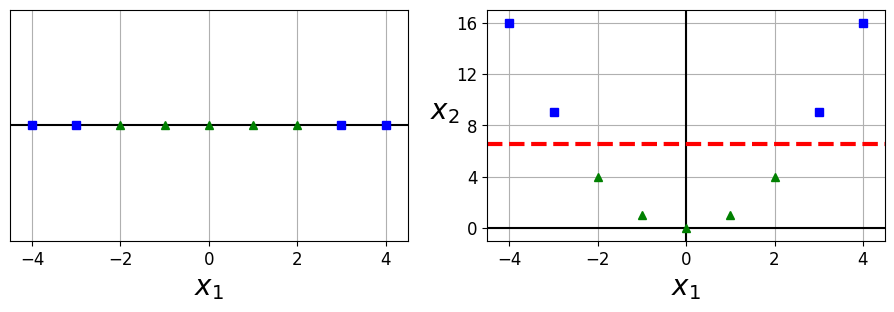

In [13]:
plt.figure(figsize=(10, 3))

# 왼편 그래프
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")          # 파랑 네모(음성)
plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")          # 초록 세모(양성)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

# 오른편 그래프 (결정경계 찾기 수월, 결정경계는 결정함수가 0인 지점)
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")       # 파랑 네모
plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")       # 초록 세모
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)  # 빨강 실선
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("higher_dimensions_plot", tight_layout=False)
plt.show()

# 왼편 그래프: 선형 분류 불가능
# 오른편 그래프: 2차 다항 특성을 추가한 결과 선형 분류 가능해짐

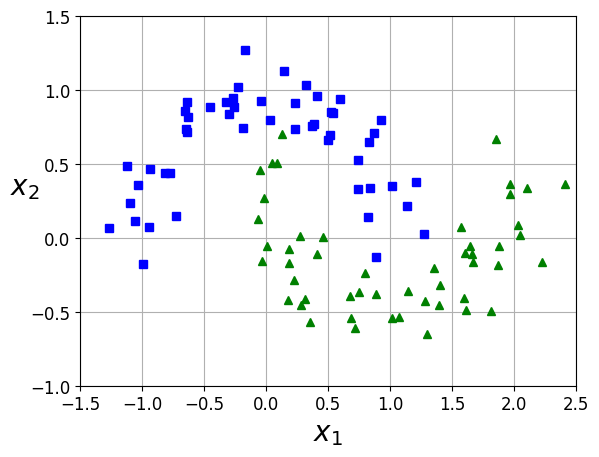

In [14]:
# 100개의 샘플로 구성된 moons 데이터셋 준비
# moons 데이터셋은 지정된 수의 데이터가 선형 분류가 불가능한 두 개의 반달 모양으로 구분되어 있다.
from sklearn.datasets import make_moons # 데이터셋!!
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

# 산점도 그리기 함수
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")   # 파랑 네모: 음성 데이터
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")   # 초록 세모: 양성 데이터
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

**위의 그래프를 보면 한눈에 봐도 선형으로 결정경계를 그리는건 어려워 보인다. 이를 다항 특성을 추가해서 해결해보자**

## LinearSVC

아래 코드는 3차 다항 특성을 추가할 경우 moons 데이터셋을 선형 분류로 해결할 수 있음을 보여주는
그림을 그린다.

* `PolynomialFeatures(degree=3)`: 3차 다항 특성까지 추가

In [15]:

from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures # 이걸 사용!!

polynomial_svm_clf = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm_clf.fit(X, y)

/usr/local/lib/python3.9/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge', random_state=42))])

그림 저장: moons_polynomial_svc_plot


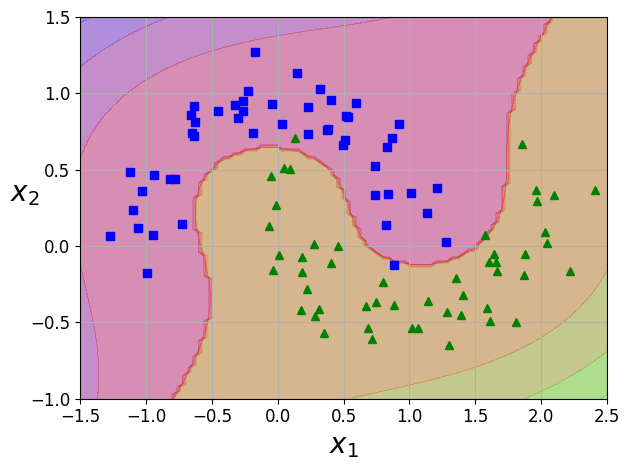

In [18]:
# 훈련된 SVM 모델의(clf) 결정경계를 그려준다.
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100) # 해당 범위에 100개 포인트(x)
    x1s = np.linspace(axes[2], axes[3], 100) # 해당 범위에 100개 포인트(y)
    x0, x1 = np.meshgrid(x0s, x1s) # 2d 좌표에 있는 x,y좌표를 모두 구함(meshgrid함수)
    X = np.c_[x0.ravel(), x1.ravel()]
    
    y_pred = clf.predict(X).reshape(x0.shape) # 예측값
    y_decision = clf.decision_function(X).reshape(x0.shape) # 결정함수 값
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)       # 결정경계 그리기
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.3)   # 등고선 그리기

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

save_fig("moons_polynomial_svc_plot")
plt.show()

## 다항 커널(SVC)

다항 특성 추가 기법은 모든 선형 회귀/분류 모델과 함께 사용할 수 있다.
하지만 다항 특성을 추가해서 훈련하는 비용이 경우에 따라 매우 비쌀 수 있다.

그런데 SVM의 경우 __커널 트릭__(kernel trick)을 사용하면 실제로는 특성을 추가하지 않지만
특성을 추가한 효과를 얻을 수 있다. 
`SVC` 모델의 경우 `poly` 커널과 적절한 다항 차수(degree)를 지정하면 
해당 차수만큼의 다항 특성을 추가한 효과를 낸다.

예를 들어 아래 코드는 3차와 10차 다항 특성을 추가한 효과를 이용하여 moons 데이터셋을 분류한 
결과를 그림으로 보여준다.

* 표준화 축척 조정 적용
* `kernel=poly`: 다항 커널 선택
* 다항 특성
    - 왼편: `degree=3` 
    - 오른편: `degree=10` 
* `coef0`: 식 5-10(p.  225)의 $r$에 해당하는 값이며, 값에 비례하여 추가되는 고차항의 영향력이 세짐. 기본값은 0.
    - 왼편: `coef0=1`
    - 오른편: `coef0=100`
* `C=5`: 마진 허용 정도

In [19]:
# kernel = poly(다항 커널을 의미)
from sklearn.svm import SVC

# 3차 다항 커널 활용
poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))  
    ])
poly_kernel_svm_clf.fit(X, y)

# 10차 다항 커널 활용
poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=5, coef0=100, degree=10, kernel='poly'))])

그림 저장: moons_kernelized_polynomial_svc_plot


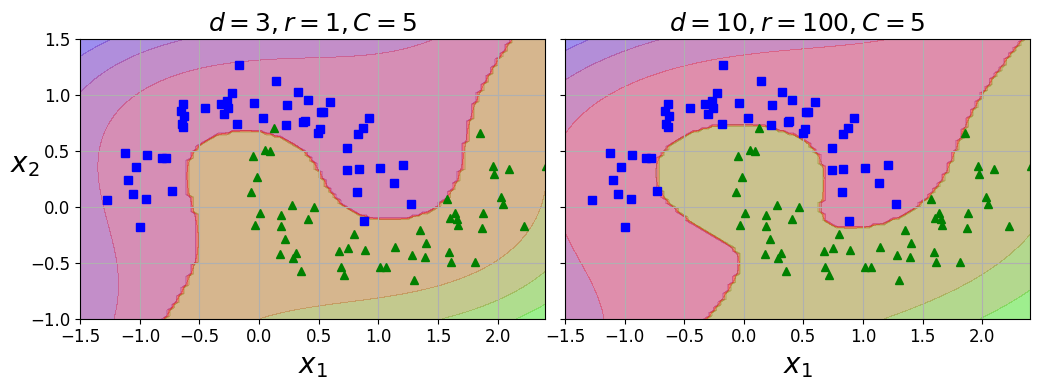

In [20]:
# 방금 만든 그래프 그리는 함수 사용해서 그래프 그리기
fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

# 오른편 그림
plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

save_fig("moons_kernelized_polynomial_svc_plot")
plt.show()

## 가우시안 RBF

랜드마크 $\ell$(엘)과 샘플 $\mathbf{x}$ 사이의 유사도를 아래 함수값으로 계산한다.
$\gamma$ 값이 클수록 가까운 샘플을 선호하게 되어 즉 샘플들 사이의 영향을 보다 적게 고려한다.
따라서 모델의 자유도를 높이게 되어 과대적합 위험이 커진다.

$$
{\displaystyle \phi_{\gamma}(\mathbf{x}, \boldsymbol{\ell})} = {\displaystyle \exp({\displaystyle -\gamma \left\| \mathbf{x} - \boldsymbol{\ell} \right\|^2})}
$$

유사도 특성을 추가하여 고차원 데이터셋을 생성한 후 선형분류를 시도한다.
추가되는 유사도 특성은 사용되는 랜드마크 수에 의존한다.

* 유사도 특성(similarity feature): __랜드마크__(landmark)라 불리는 특정 샘플과 각 샘플 사이의 유사도(유사성 정도)로 이루어지 특성

* 유사도 함수(similarity function):` 유사도 측정 함수 `
    * 예제: 방사 기저 함수(radial basis function, RBF)

In [21]:
# 선형적으로 구분할 수 없었던 데이터셋(X1D)을 가우시안 RBF 함수를 적용하여 선형적으로 구분할 수 있음을 보여준다.

def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2) # 위 공식

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1) # 200개 포인트

# 왼편 그림에 사용되는 유사도 특성 2개: 방사 기저 함수의 그래프 그리기
x2s = gaussian_rbf(x1s, -2, gamma)   # 랜드마크 -2와의 유사도 특성 (-2와 가까울수록 영향을 많이받아 1에 가까운 출력)
x3s = gaussian_rbf(x1s, 1, gamma)    # 랜드마크 1과의 유사도 특성 (1과 가까울수록 영향을 많이받아 1에 가까운 출력)

# 오른편 그림에 사용되는 2개의 유사도 특성. 원시 특성 X1D의 유사도 특성이지만 그림에는 표시하지 않음.
XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)] # 랜드마크 -2, 1
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

예를 들어, `x=-1`과 두 개의 랜드마크 사이의 유사도는 다음과 같다.

In [22]:
x1_example = X1D[3, 0]   # -1

for landmark in (-2, 1): # 2개의 랜드마크(-2, 1)
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))

Phi(-1.0, -2) = [0.74081822]
Phi(-1.0, 1) = [0.30119421]


아래 그림에서 $\mathbf{x}$로 표기된 점이 `x=-1`에 해당한다.
* 위에서 구한 유사도 값을 그래프에서 찾아 보면 동일하게 잘 구해졌다.

그림 저장: kernel_method_plot


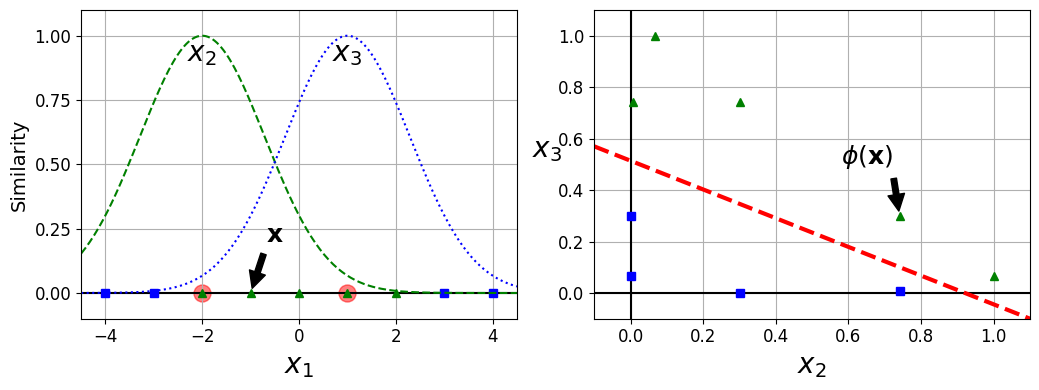

In [23]:
plt.figure(figsize=(10.5, 4))

# 왼편 그림: 종 모양 방사 기저 함수 그래프
plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1D[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

# 오른편 그림: 원시 데이터셋 X1D를 이용한 두 개의 유사도 특성을 이용하여 선형 분류 가능함을 보여줌.
plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)

save_fig("kernel_method_plot")
plt.show()

# 즉, 비선형적인 데이터셋으로 선형 결정경계를 찾을 수 있다.
# 아래 오른쪽 그림처럼 직관적으로 나눌수 있게 된 것

## 가우시안 RBF 커널

모든 샘플을 랜드마크로 지정하는 것이 가장 간단하다.
그런데 이렇게 하면 특성 수가 샘플 수 $m$만큼 늘어난다. 
따라서 훈련 세트가 매우 클 경우 매우 많은 특성이 생겨난다. 

하지만 RBF 커널을 이용하면 다항 커널의 경우처럼 유사도 특성을 실제로는 추가하지 않지만
추가한 효과를 내게 할 수 있다. 
사용법은 `kernel="rbf"`와 적절한 `gamma` 하이퍼파라미터 값을 지정하면 된다.

그림 저장: moons_rbf_svc_plot


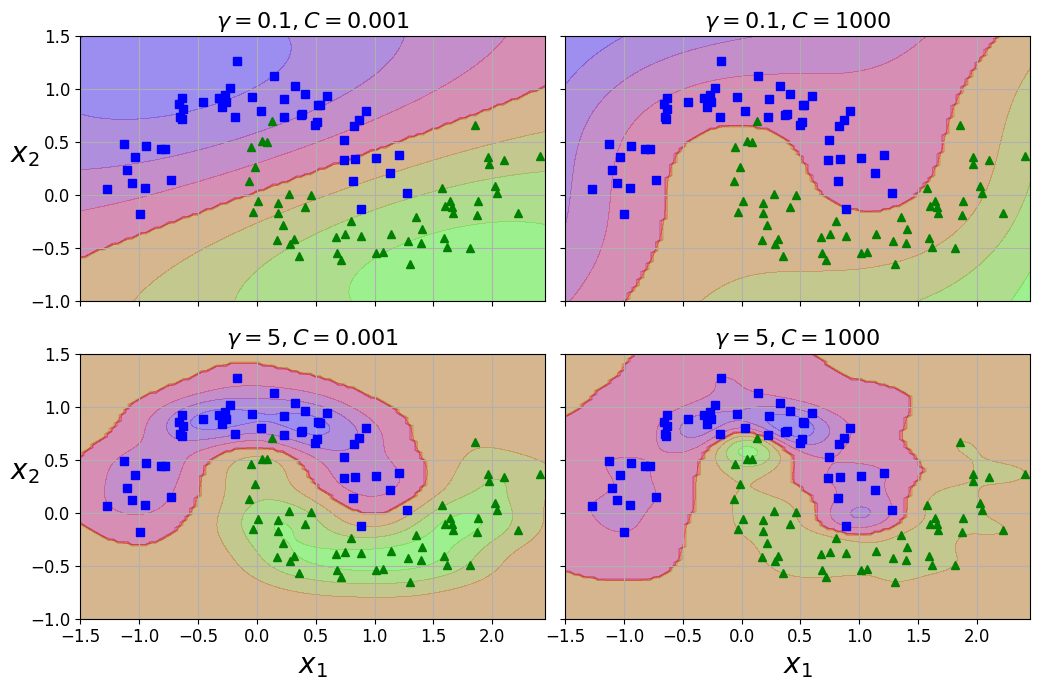

In [24]:
# `gamma`와 `C`의 조합 4가지 경우를 그래프 그리기

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)  # gamma와 C의 조합 4 가지

# RBF 커널 사용 SVC 모델 4 개 리스트
svm_clfs = []   
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

# 그림 그리기
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

save_fig("moons_rbf_svc_plot")
plt.show()

# C=0.001은 규제를 강하게 준건데 결정경계 선을보면 간단(간단한 모델)
# C=1000은 규제를 약하게 준건데 결정경계 선을보면 복잡(복잡한 모델) - 대신 좀 더 잘 나뉘어져 있다.
# 감마는 키울수록 굉장히 복잡한 결정경계를 구성하고 있다. - 인접한 샘플에 영향을 미치기 때문

# 5.3 SVM 회귀

아래 코드는 선형 SVM 회귀를 설명하기 위해 선형 회귀 학습이 가능한 50개의 샘플을 잡음을 섞어 생성한다.

In [25]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel() # 노이즈 살짝 줬음

두 개의 `LinearSVR` 모델을 훈련시킨다.

* `epsilon=1.5`/`epsilon=0.5`: 결정 도로의 폭 지정. 기본값은 0.
* `C=1`: 마진 오류 허용 정도. 기본값은 1이며 규제 세기는 `C` 크기에 반 비례.

In [26]:
# 회귀 모델의 손실함수 -> max(0, |y-y_hat|-epsilon)
# 해당 공식을 이해하자면, 엡실론이 도로 폭이라고 했는데 도로 폭에 전부 값들이 들어온다면?
# |y-y_hat|보다 엡실론이 더 크다는거고, 그것은 곧 음수값을 가진다.
# 이때 max(0, 음수) = 0 이 나와서 손실이 0임을 알 수 있다!!
# 그렇다면 |y-y_hat|이 엡실론보다 작아야 좋겠죠. 
from sklearn.svm import LinearSVR

svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)

LinearSVR(epsilon=0.5, random_state=42)

In [27]:
# 아래 함수는 마진 오류 샘플들의 인덱스를 찾는다.
def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon) # 도로폭 밖 샘플 의미(결정경계에 영향을 미치는것들)
    return np.argwhere(off_margin)

# 두 `LinearSVR` 회귀 모델의 마진 오류
svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)

# 경계도로 폭(epsilon)을 보여주기 위한 좌표 지정
eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

`plot_svm_regression()` 함수는 SVM 회귀 결과를 결정경계와 함께 그림으로 그려준다. 
사용된 인자는 다음과 같다.

* `svm_reg`: 훈련된 `LinearSVR` 모델
* `X`, `y`: 데이터셋(특성과 타깃)
* `axes`: x/y 축 구간 지정

In [28]:
def plot_svm_regression(svm_reg, X, y, axes):
    # 결정경계 선과 도로 경계 그리기
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")   # 결정경계 선 (검은 실선)
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")                 # 위쪽 도로 경계 (검은 파선)
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")                 # 아랫쪽 도로 경계 (검은 파선)
    
    # X 데이터셋의 샘플 중에서 마진 오류 샘플 표시하기 (분홍 원)
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    
    # X, y 데이터셋 표기 (파랑 점)
    plt.plot(X, y, "bo")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

아래 코드는 `epsilon`을 달리하는 두 `LinearSVR` 모델의 훈련 결과를 보여준다.

그림 저장: svm_regression_plot


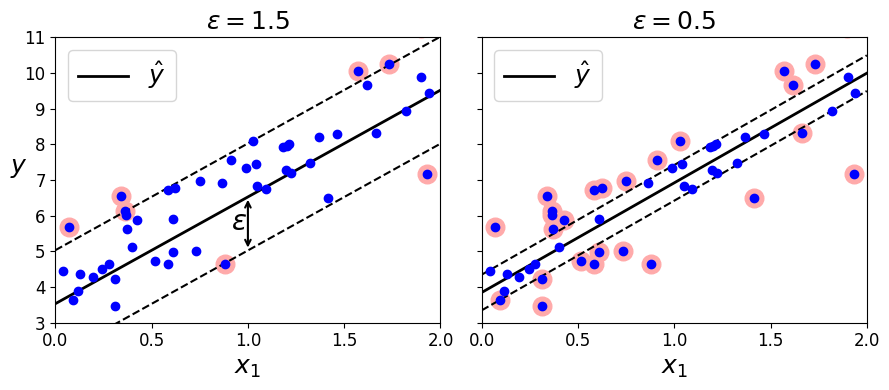

In [29]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그림
plt.sca(axes[0])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)

# x1=1을 이용하여 결정경계 도로 폭(epsilon) 위아래 화살표로 표시하기
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)

# 오른편 그림
plt.sca(axes[1])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)
save_fig("svm_regression_plot")
plt.show()

In [ ]:
np.random.seed(42)
m = 100 # 100개 샘플
X = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * X + 0.5 * X**2 + np.random.randn(m, 1)/10).ravel() # 비선형

2차 다항 커널을 사용하는 두 개의 `SVR` 모델을 훈련시킨다. `C` 규제를 달리한다.

* `kernel=poly`: 다항 커널
* `degree=2`: 2차 다항식 추가(효과)
* `epsilon=0.1`: 결정 도로. 조금 작게.
* `C=100`/`C=0.01`: 마진 오류 허용 정도가 다름.

In [30]:
from sklearn.svm import SVR

# scale = 1/(특성수*특성의분산)
svm_poly_reg1 = SVR(kernel="poly", degree=2, C=100, epsilon=0.1, gamma="scale")
svm_poly_reg2 = SVR(kernel="poly", degree=2, C=0.01, epsilon=0.1, gamma="scale")
svm_poly_reg1.fit(X, y)
svm_poly_reg2.fit(X, y)

SVR(C=0.01, degree=2, kernel='poly')

아래 코드는 마진 오류 허용 정도 `C`를 달리하며 2차 다항 커널을 사용하는 두 `SVR` 모델의 훈련 결과를 보여준다.

| 왼편 그래프(C=100)    | 오른편 그래프(C=0.01)    |
| -------------: | -------------: |
| 규제 보다 약함 | 규제 보다 강함 |
| 샘플에 덜 민감 | 샘플에 더 민감 |
| 마진 오류 보다 적게 | 마진 오류 보다 많이  |

그림 저장: svm_with_polynomial_kernel_plot


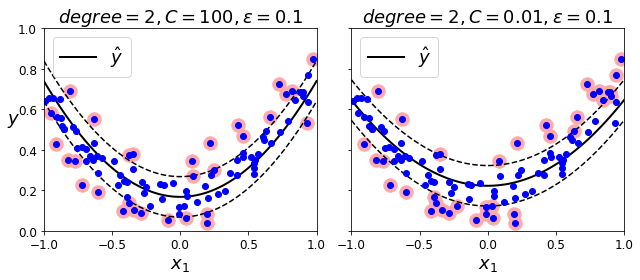

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(9, 4), sharey=True)

# 왼편 그림: C=100
plt.sca(axes[0])
plot_svm_regression(svm_poly_reg1, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg1.degree, svm_poly_reg1.C, svm_poly_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)

# 오른편 그림: C=0.01
plt.sca(axes[1])
plot_svm_regression(svm_poly_reg2, X, y, [-1, 1, 0, 1])
plt.title(r"$degree={}, C={}, \epsilon = {}$".format(svm_poly_reg2.degree, svm_poly_reg2.C, svm_poly_reg2.epsilon), fontsize=18)
save_fig("svm_with_polynomial_kernel_plot")
plt.show()

# C=100은 규제가 약해서 좀더 복잡한 그래프(기욱기 다 크죠)
# C=0.01은 규제가 강해서 좀더 약한 그래프(기울기 더 작죠)

# 5.4 SVM 이론

**식 5-2: 선형 SVM 분류기의 예측**
* 물론 아래식에서 음성, 양성을 0으로할지 1로할지는 자유

$
\hat{y} = \begin{cases}
 0 & \mathbf{w}^T \mathbf{x} + b < 0 \text{ 일 때}, \\
 1 & \mathbf{w}^T \mathbf{x} + b \geq 0 \text{ 일 때}
\end{cases}
$

In [ ]:
# 아래 코드는 버지니카 품종 여부 판정을 위해 훈련시킨 선형 SVM 분류 모델을 보여준다
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64)  # 버지니카 품종 여부

그림 저장: iris_3D_plot


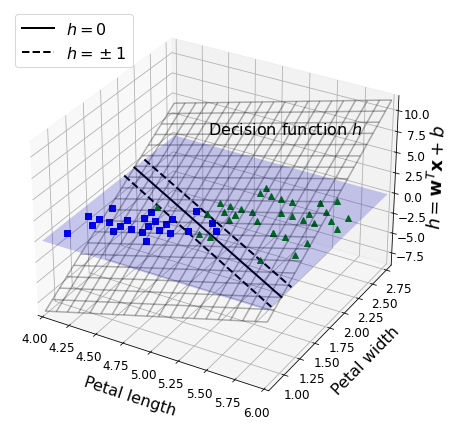

In [ ]:
# 힌지함수(손실함수) = max(0,1-t*y)
# 다시 상기시키지만, 공식 특성상 -1~1 사이여야 힌지함수가 0이 되기 때문에 
# -1~1사이에 다 위치하면 결정경계를 잘 찾아진거라 할 수 있다.

from mpl_toolkits.mplot3d import Axes3D

def plot_3D_decision_function(ax, w, b, x1_lim=[4, 6], x2_lim=[0.8, 2.8]):
    x1_in_bounds = (X[:, 0] > x1_lim[0]) & (X[:, 0] < x1_lim[1])
    X_crop = X[x1_in_bounds]
    y_crop = y[x1_in_bounds]
    x1s = np.linspace(x1_lim[0], x1_lim[1], 20)
    x2s = np.linspace(x2_lim[0], x2_lim[1], 20)
    x1, x2 = np.meshgrid(x1s, x2s)
    xs = np.c_[x1.ravel(), x2.ravel()]
    df = (xs.dot(w) + b).reshape(x1.shape)
    m = 1 / np.linalg.norm(w)
    # 아래 3줄 공식을 유도
    # y = x1s * w[0] + x2s * w[1] + b : 이게 기본 공식
    # 0 = x1s * w[0] + x2s * w[1] + b : boundary_x2s 즉, 결정경계 선
    # 1 = x1s * w[0] + x2s * w[1] + b : margin_x2s_1 즉, 결정 도로 경계 선
    # -1 = x1s * w[0] + x2s * w[1] + b : margin_x2s_2 즉, 결정 도로 경계 선
    boundary_x2s = -x1s*(w[0]/w[1])-b/w[1]
    margin_x2s_1 = -x1s*(w[0]/w[1])-(b-1)/w[1]
    margin_x2s_2 = -x1s*(w[0]/w[1])-(b+1)/w[1]

    ax.plot_surface(x1s, x2, np.zeros_like(x1),
                    color="b", alpha=0.2, cstride=100, rstride=100)
    ax.plot(x1s, boundary_x2s, 0, "k-", linewidth=2, label=r"$h=0$")
    ax.plot(x1s, margin_x2s_1, 0, "k--", linewidth=2, label=r"$h=\pm 1$")
    ax.plot(x1s, margin_x2s_2, 0, "k--", linewidth=2)
    ax.plot(X_crop[:, 0][y_crop==1], X_crop[:, 1][y_crop==1], 0, "g^")
    ax.plot_wireframe(x1, x2, df, alpha=0.3, color="k")
    ax.plot(X_crop[:, 0][y_crop==0], X_crop[:, 1][y_crop==0], 0, "bs")
    ax.axis(x1_lim + x2_lim)
    ax.text(4.5, 2.5, 3.8, "Decision function $h$", fontsize=16)
    ax.set_xlabel(r"Petal length", fontsize=16, labelpad=10)
    ax.set_ylabel(r"Petal width", fontsize=16, labelpad=10)
    ax.set_zlabel(r"$h = \mathbf{w}^T \mathbf{x} + b$", fontsize=18, labelpad=5)
    ax.legend(loc="upper left", fontsize=16)

fig = plt.figure(figsize=(11, 6))
ax1 = fig.add_subplot(111, projection='3d')
plot_3D_decision_function(ax1, w=svm_clf2.coef_[0], b=svm_clf2.intercept_[0])

save_fig("iris_3D_plot")
plt.show()

# 결정경계(검정 실선): 결정 함수값(=h)이 0이 되도록 하는 샘플들의 집합
# 결정 도로 경계(검정 파선): 결정 함수값이  ± 1이 되도록 하는 샘플들의 집합
# 아래 파란색 평면은 h=0부분이며 이게 결정경계이다.
# 그리고 각 포인트들이 기울어져서 나타낸 평면인 결정함수에 매핑

# 결정함수 평면이 결정경계 평면에 투영했을때 포개질수록 결정 도로 경계 폭이 커지는 특징!

## 작은 가중치 벡터가 라지 마진을 만듦

그림 저장: small_w_large_margin_plot


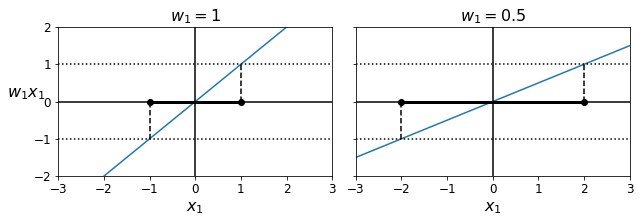

In [ ]:
def plot_2D_decision_function(w, b, ylabel=True, x1_lim=[-3, 3]):
    x1 = np.linspace(x1_lim[0], x1_lim[1], 200)
    y = w * x1 + b
    m = 1 / w

    plt.plot(x1, y)
    plt.plot(x1_lim, [1, 1], "k:")
    plt.plot(x1_lim, [-1, -1], "k:")
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot([m, m], [0, 1], "k--")
    plt.plot([-m, -m], [0, -1], "k--")
    plt.plot([-m, m], [0, 0], "k-o", linewidth=3)
    plt.axis(x1_lim + [-2, 2])
    plt.xlabel(r"$x_1$", fontsize=16)
    if ylabel:
        plt.ylabel(r"$w_1 x_1$  ", rotation=0, fontsize=16)
    plt.title(r"$w_1 = {}$".format(w), fontsize=16)

fig, axes = plt.subplots(ncols=2, figsize=(9, 3.2), sharey=True)
plt.sca(axes[0])
plot_2D_decision_function(1, 0)
plt.sca(axes[1])
plot_2D_decision_function(0.5, 0, ylabel=False)
save_fig("small_w_large_margin_plot")
plt.show()

# 가중치가 작은 오른쪽 그래프가 더 폭이 넓은걸 알 수 있다.(2차원으로 그렸음)

**식 5-3: 하드 마진 선형 SVM 분류기 목적 함수**
* 첫번째 식은 w를 줄이는 목적(minimize)
* 두번째 목적함수 식은 1-t*y<0 (오차함수 힌지 의미)

$
\begin{split}
&\underset{\mathbf{w}, b}{\operatorname{minimize}}\quad{\frac{1}{2}\mathbf{w}^T \mathbf{w}} \\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

**식 5-4: 소프트 마진 선형 SVM 분류기 목적 함수**
* 규제를 강하게(C값 작게) 할수록 zeta가 커지고(=마진(도로폭)은 늘어나고) w는 줄어드는(=모델은 단순해지는) 효과가 있다.
  * zeta는 샘플들이 얼마나 마진을 위배해도 되는지를 결정
  * 또한 C값에 따라서 이렇게 규제를 강하게 또는 약하게 줄 수 있어서 적절한 C값을 찾아서 사용해야한다.
* 이렇게 제약이 있는 문제를 보통 원문제라고 부르고 있다.
  * 이것을 쌍대문제로 푸는걸 아래에서 알려주겠다.

$
\begin{split}
&\underset{\mathbf{w}, b, \mathbf{\zeta}}{\operatorname{minimize}}\quad{\dfrac{1}{2}\mathbf{w}^T \mathbf{w} + C \sum\limits_{i=1}^m{\zeta^{(i)}}}\\
&\text{subject to} \quad t^{(i)}(\mathbf{w}^T \mathbf{x}^{(i)} + b) \ge 1 - \zeta^{(i)} \quad \text{and} \quad \zeta^{(i)} \ge 0 \quad \text{for } i = 1, 2, \dots, m
\end{split}
$

**식 5-8: 2차 다항식 매핑**
* LinearSVC dual = True(좌표 경사법) / False(뉴턴 메서드)
  * 이 dual을 쌍대문제로 보면 될 것이다.
* SVC / SVR -> 커널 트릭
  * 커널 트릭은 항상 쌍대문제를 품

$
\phi\left(\mathbf{x}\right) = \phi\left( \begin{pmatrix}
  x_1 \\
  x_2
\end{pmatrix} \right) = \begin{pmatrix}
  {x_1}^2 \\
  \sqrt{2} \, x_1 x_2 \\
  {x_2}^2
\end{pmatrix}
$


**식 5-9: 2차 다항식 매핑을 위한 커널 트릭**

$
\begin{split}
\phi(\mathbf{a})^T \phi(\mathbf{b}) & \quad = \begin{pmatrix}
  {a_1}^2 \\
  \sqrt{2} \, a_1 a_2 \\
  {a_2}^2
  \end{pmatrix}^T \begin{pmatrix}
  {b_1}^2 \\
  \sqrt{2} \, b_1 b_2 \\
  {b_2}^2
\end{pmatrix} = {a_1}^2 {b_1}^2 + 2 a_1 b_1 a_2 b_2 + {a_2}^2 {b_2}^2 \\
 & \quad = \left( a_1 b_1 + a_2 b_2 \right)^2 = \left( \begin{pmatrix}
  a_1 \\
  a_2
\end{pmatrix}^T \begin{pmatrix}
    b_1 \\
    b_2
  \end{pmatrix} \right)^2 = (\mathbf{a}^T \mathbf{b})^2
\end{split}
$

**식 5-10: 일반적인 커널**

$
\begin{split}
\text{선형:} & \quad K(\mathbf{a}, \mathbf{b}) = \mathbf{a}^T \mathbf{b} \\
\text{다항식:} & \quad K(\mathbf{a}, \mathbf{b}) = \left(\gamma \mathbf{a}^T \mathbf{b} + r \right)^d \\
\text{가우시안 RBF:} & \quad K(\mathbf{a}, \mathbf{b}) = \exp({\displaystyle -\gamma \left\| \mathbf{a} - \mathbf{b} \right\|^2}) \\
\text{시그모이드:} & \quad K(\mathbf{a}, \mathbf{b}) = \tanh\left(\gamma \mathbf{a}^T \mathbf{b} + r\right)
\end{split}
$

**식 5-13: 선형 SVM 분류기의 비용 함수**

$
J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum\limits_{i=1}^{m}max\left(0, t^{(i)} - (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)}
$

**힌지 손실 그래프 생성 코드**

그림 저장: hinge_plot


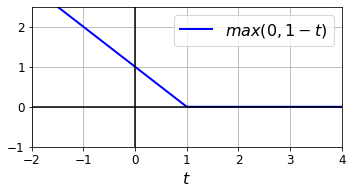

In [ ]:
t = np.linspace(-2, 4, 200)
h = np.where(1 - t < 0, 0, 1 - t)  # max(0, 1-t)

plt.figure(figsize=(5,2.8))
plt.plot(t, h, "b-", linewidth=2, label="$max(0, 1 - t)$")
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.yticks(np.arange(-1, 2.5, 1))
plt.xlabel("$t$", fontsize=16)
plt.axis([-2, 4, -1, 2.5])
plt.legend(loc="upper right", fontsize=16)
save_fig("hinge_plot")
plt.show()

## 부록 A: 훈련 시간 측정

moons 데이터셋을 이용한 이진분류 모델을 이용하여
모델의 훈련시간을 간단하게 측정하는 방법을 소개한다.

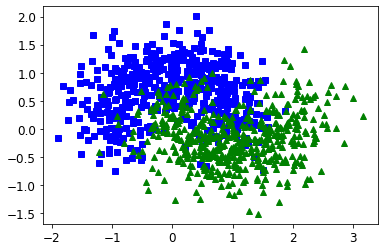

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.4, random_state=42)
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")

아래 코드는 `tol`(조기종료 조건)을 변경할 때마다 훈련 시간을 측정한 결과를 선 그래프로 보여준다.

[LibSVM]0 0.1 0.18799901008605957
[LibSVM]1 0.01 0.18291831016540527
[LibSVM]2 0.001 0.22299933433532715
[LibSVM]3 0.0001 0.4009850025177002
[LibSVM]4 1e-05 0.6682872772216797
[LibSVM]5 1.0000000000000002e-06 0.6222438812255859
[LibSVM]6 1.0000000000000002e-07 0.666668176651001
[LibSVM]7 1.0000000000000002e-08 0.66237473487854
[LibSVM]8 1.0000000000000003e-09 0.6582813262939453
[LibSVM]9 1.0000000000000003e-10 0.6564273834228516


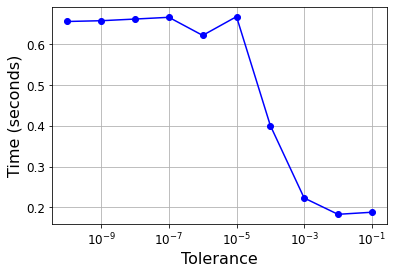

In [ ]:
import time

tol = 0.1
tols = []
times = []
for i in range(10):
    svm_clf = SVC(kernel="poly", gamma=3, C=10, tol=tol, verbose=1)
    t1 = time.time()
    svm_clf.fit(X, y)
    t2 = time.time()
    times.append(t2-t1)
    tols.append(tol)
    print(i, tol, t2-t1)
    tol /= 10
plt.semilogx(tols, times, "bo-")
plt.xlabel("Tolerance", fontsize=16)
plt.ylabel("Time (seconds)", fontsize=16)
plt.grid(True)
plt.show()

## 부록 B: 선형 SVM 분류기 구현하기

경사하강법을 이용하여 선형 SVM 분류기를 직접 구현하는 과정을 보여준다.

### 선형 SVM 분류기 클래스 선언

`MyLinearSVC` 클래스를 선언한다.
비용함수는 책 227쪽, 식 5-13에서 소개한 아래 함수이다. 

$$
J(\mathbf{w}, b) = \dfrac{1}{2} \mathbf{w}^T \mathbf{w} \,+\, C {\displaystyle \sum_{i=1}^{m}\max\left(0, 1 - t^{(i)} (\mathbf{w}^T \mathbf{x}^{(i)} + b) \right)}
$$

In [ ]:
from sklearn.base import BaseEstimator

class MyLinearSVC(BaseEstimator):
    def __init__(self, C=1, eta0=1, eta_d=10000, n_epochs=1000, random_state=None):
        # 하이퍼파라미터
        self.C = C                            
        self.eta0 = eta0
        self.n_epochs = n_epochs
        self.random_state = random_state
        self.eta_d = eta_d

    # 학습 스케줄
    def eta(self, epoch):
        return self.eta0 / (epoch + self.eta_d)
        
    def fit(self, X, y):
        # 파라미터 w와 b를 무작위 초기화하기
        if self.random_state:
            np.random.seed(self.random_state)
        w = np.random.randn(X.shape[1], 1) 
        b = 0

        m = len(X)
        t = y * 2 - 1  # -1 if t==0, +1 if t==1
        X_t = X * t
        
        # 에포크별 비용 함숫값 저정
        self.Js=[]

        # 훈련
        for epoch in range(self.n_epochs):
            support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()
            X_t_sv = X_t[support_vectors_idx]
            t_sv = t[support_vectors_idx]
            
            # 비용 함숫값 계산(식 5-13과 다르게 보이지만 서포트 벡터만 다루기에 결국 동일한 값임)
            J = 1/2 * np.sum(w * w) + self.C * (np.sum(1 - X_t_sv.dot(w)) - b * np.sum(t_sv))
            self.Js.append(J)

            w_gradient_vector = w - self.C * np.sum(X_t_sv, axis=0).reshape(-1, 1)
            b_derivative = -self.C * np.sum(t_sv)
            
            # w, b 업데이트
            w = w - self.eta(epoch) * w_gradient_vector
            b = b - self.eta(epoch) * b_derivative
            

        self.intercept_ = np.array([b])                          # 절편(b) 저장
        self.coef_ = np.array([w])                               # 파라미터 벡터(w) 저장
        support_vectors_idx = (X_t.dot(w) + t * b < 1).ravel()   # 서포트 벡터 인덱스
        self.support_vectors_ = X[support_vectors_idx]           # 서포트 벡터 저장
        return self

    def decision_function(self, X):                              # 결정 함수
        return X.dot(self.coef_[0]) + self.intercept_[0]

    def predict(self, X):
        return (self.decision_function(X) >= 0).astype(np.float64)

훈련 세트로 붓꽃 데이터셋을 사용한다. 
버지니카 품종 여부를 판단하는 이진분류 훈련을 진행한다.

In [ ]:
# 훈련 세트
X = iris["data"][:, (2, 3)] # # 꽃잎 길이, 꽃잎 너비
y = (iris["target"] == 2).astype(np.float64).reshape(-1, 1) # Iris virginica

`MyLinearSVC` 모델을 훈련시킨다. (사이킷런의 SVC 모델 보다 좀 많이 느리다.)

In [ ]:
svm_clf = MyLinearSVC(C=2, eta0 = 10, eta_d = 1000, n_epochs=60000, random_state=2)
svm_clf.fit(X, y)

MyLinearSVC(C=2, eta0=10, eta_d=1000, n_epochs=60000, random_state=2)

훈련 과정 중에 비용함숫값의 변화는 다음과 같다.

(0.0, 60000.0, 0.0, 100.0)

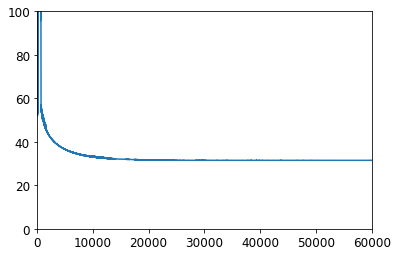

In [ ]:
plt.plot(range(svm_clf.n_epochs), svm_clf.Js)
plt.axis([0, svm_clf.n_epochs, 0, 100])

학습된 절편(b)와 특성 파라미터(w)는 다음과 같다.

In [ ]:
print(svm_clf.intercept_, svm_clf.coef_)

[-15.56761653] [[[2.28120287]
  [2.71621742]]]


### 사이킷런의 SVC 모델과의 성능 비교

동일한 데이터셋에 대해 사이킷런의 SVC 모델을 사용한다.
조기종료 조건 `tol=1e-3`이 충족될 때까지 반복 학습함에도 불구하고 학습 속도가 훨씬 빠르다.

In [ ]:
svm_clf2 = SVC(kernel="linear", C=C)
svm_clf2.fit(X, y.ravel())               # ravel() 메서드 활용에 주의할 것

SVC(C=1000, kernel='linear')

학습된 w와 b는 매우 이전과 매우 유사하다.

In [ ]:
print(svm_clf2.intercept_, svm_clf2.coef_)

[-32.58466933] [[3.99841146 7.99467729]]


실제로 두 모델의 성능을 그래프로 그려보면 다음과 같다.

(4.0, 6.0, 0.8, 2.8)

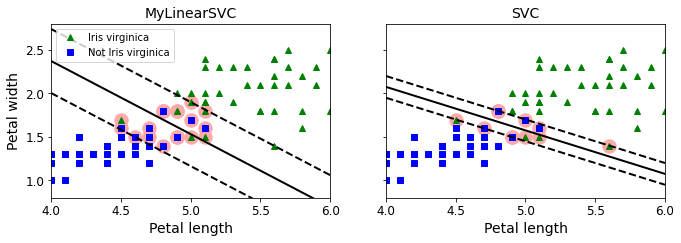

In [ ]:
yr = y.ravel()

fig, axes = plt.subplots(ncols=2, figsize=(11, 3.2), sharey=True)

# 왼편 그래프
plt.sca(axes[0])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^", label="Iris virginica")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs", label="Not Iris virginica")
plot_svc_decision_boundary(svm_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("MyLinearSVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])
plt.legend(loc="upper left")

# 오른편 그래프
plt.sca(axes[1])
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(svm_clf2, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.title("SVC", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])


### SGDClassifier 모델과의 성능 비교

`SGDClassifier` 모델을 SVM 용도로 훈련시키기 위해 힌지 손실 함수를 사용한다. 

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss="hinge", alpha=0.017, max_iter=1000, tol=1e-3, random_state=42)
sgd_clf.fit(X, y.ravel())

SGDClassifier(alpha=0.017, random_state=42)

`SGDClassifier` 모델은 원래 SVM 용도로 만들어지지 않았기에 서포트 벡터에 대한 정보를 제공하지 않는다.
아래 코드는 필요한 정보를 구하는 방버을 보여주며 이를 이용하여 결정 경계 도로를 함께 그려준다.

__주의사항:__ 파라미터를 $\theta_0, \dots, \theta_n$으로 사용한다. 즉, 다음이 성립한다.

$$
\begin{align*}
\theta_0 &= b \\
\theta_i &= w_i\quad (i = 1, \dots, n)
\end{align*}
$$

[-12.52988101   1.94162342   1.84544824]


(4.0, 6.0, 0.8, 2.8)

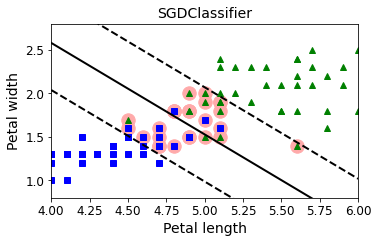

In [ ]:
# theta 확인
m = len(X)
t = y * 2 - 1                     # t==0이면 -1, t==1이면 +1
X_b = np.c_[np.ones((m, 1)), X]   # 편향 x0=1 추가.
X_b_t = X_b * t
sgd_theta = np.r_[sgd_clf.intercept_[0], sgd_clf.coef_[0]]
print(sgd_theta)

# 서포트 벡터 관련 정보 확인하기
support_vectors_idx = (X_b_t.dot(sgd_theta) < 1).ravel()
sgd_clf.support_vectors_ = X[support_vectors_idx]

sgd_clf.C = C

# 그림 그리기
plt.figure(figsize=(5.5,3.2))
plt.plot(X[:, 0][yr==1], X[:, 1][yr==1], "g^")
plt.plot(X[:, 0][yr==0], X[:, 1][yr==0], "bs")
plot_svc_decision_boundary(sgd_clf, 4, 6)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.title("SGDClassifier", fontsize=14)
plt.axis([4, 6, 0.8, 2.8])